In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [3]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [4]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [5]:
series = pd.read_csv('city_day.csv')
series_delhi = series.loc[series['City'] == 'Delhi']
ts_delhi = series_delhi[['Date','AQI']]
#converting 'Date' column to type 'datetime' so that indexing can happen later
ts_delhi['Date'] = pd.to_datetime(ts_delhi['Date'])


In [6]:
ts_delhi.head(3)

,Date,AQI
10229,2015-01-01,472.0
10230,2015-01-02,454.0
10231,2015-01-03,143.0


In [7]:
CONSTANTE = 887/len(ts_delhi)
CONSTANTE

0.4415131906421105

In [8]:
ts_delhi = ts_delhi[:886]

In [9]:
ts_delhi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 10229 to 11114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    886 non-null    datetime64[ns]
 1   AQI     885 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.8 KB


In [10]:
ts_delhi['Date'].min(), ts_delhi['Date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2017-06-04 00:00:00'))

In [11]:
ts_delhi.isnull().sum()
ts_delhi = ts_delhi.dropna()
ts_delhi.isnull().sum()

Date    0
AQI     0
dtype: int64

In [12]:
ts_delhi = ts_delhi.set_index('Date')

In [13]:
ts_month_avg = ts_delhi['AQI'].resample('MS').mean()

In [14]:
len(ts_month_avg)

30

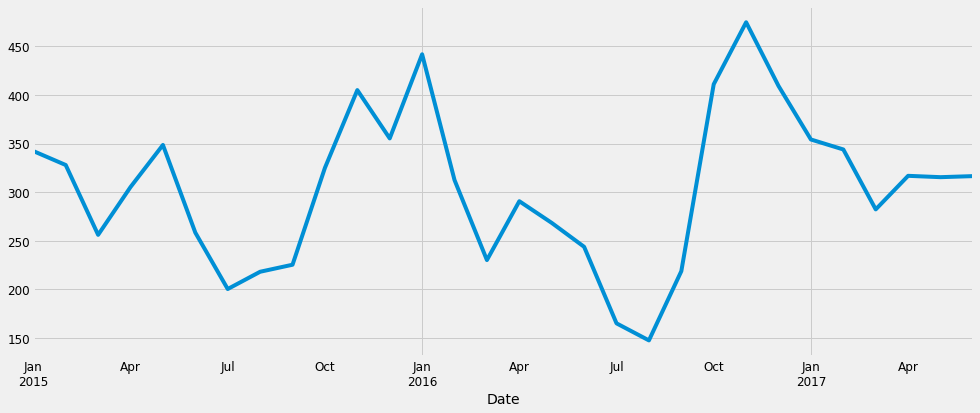

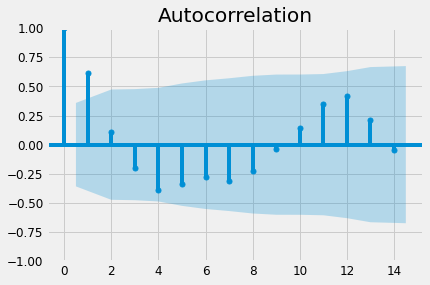

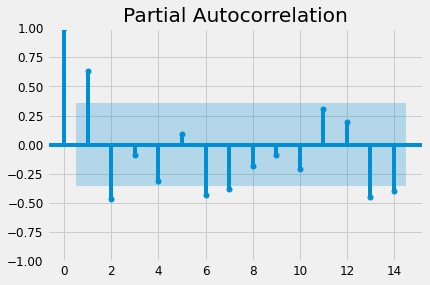

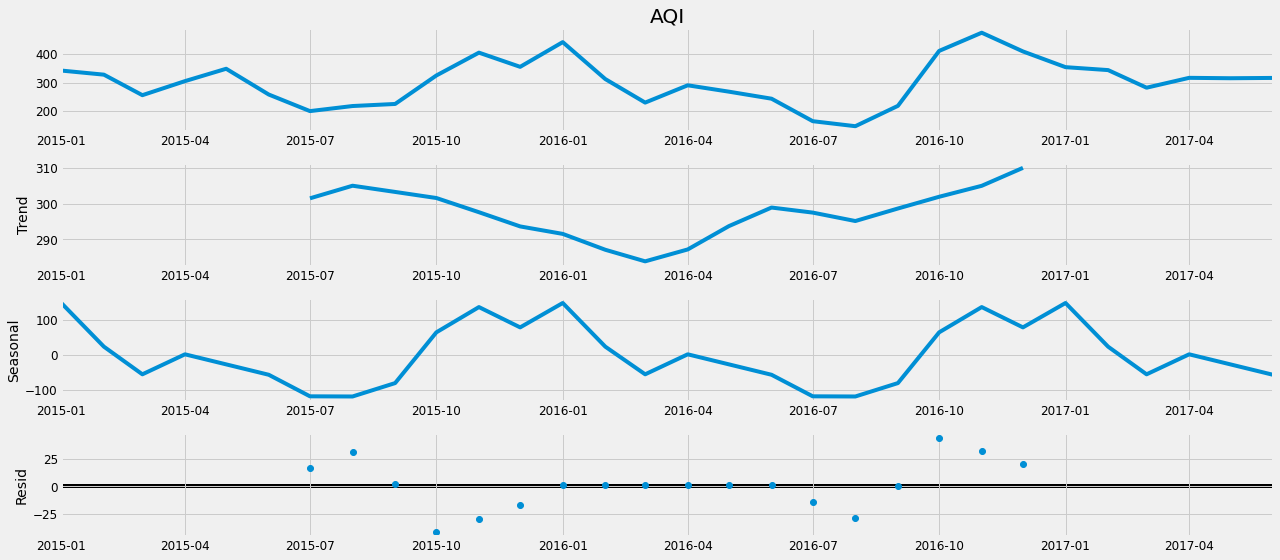

In [15]:
ts_month_avg.plot(figsize=(15, 6))
plt.show()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_month_avg, lags=14)
matplotlib.pyplot.show()
plot_pacf(ts_month_avg, lags=14)
matplotlib.pyplot.show()

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts_month_avg, model='additive')
fig = decomposition.plot()
plt.show()

In [16]:
#apply adf test on the series
print(adf_test(ts_month_avg))
print(kpss_test(ts_month_avg))

Results of Dickey-Fuller Test:
Test Statistic                 -3.451046
p-value                         0.009337
#Lags Used                      1.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64
None
Results of KPSS Test:
Test Statistic           0.085387
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
None


c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<AxesSubplot:xlabel='Date'>

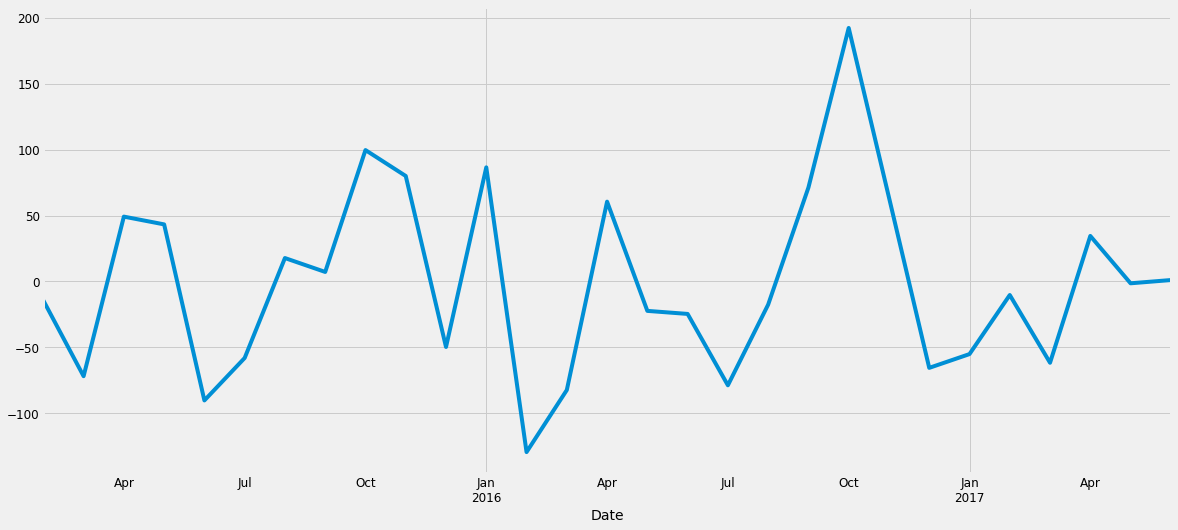

In [17]:
ts_t_adj = ts_month_avg - ts_month_avg.shift(1)
ts_t_adj = ts_t_adj.dropna()
ts_t_adj.plot()

In [18]:
#apply adf test on the series
print(adf_test(ts_t_adj))

Results of Dickey-Fuller Test:
Test Statistic                 -4.404623
p-value                         0.000291
#Lags Used                      0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64
None


<AxesSubplot:xlabel='Date'>

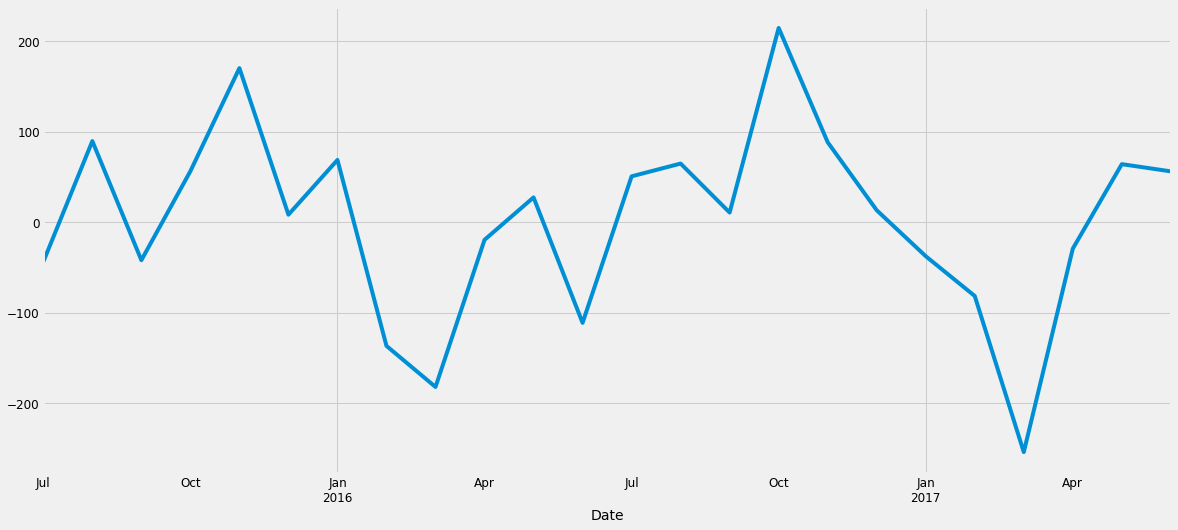

In [19]:
ts_s_adj = ts_t_adj - ts_t_adj.shift(5)
ts_s_adj = ts_s_adj.dropna()
ts_s_adj.plot()

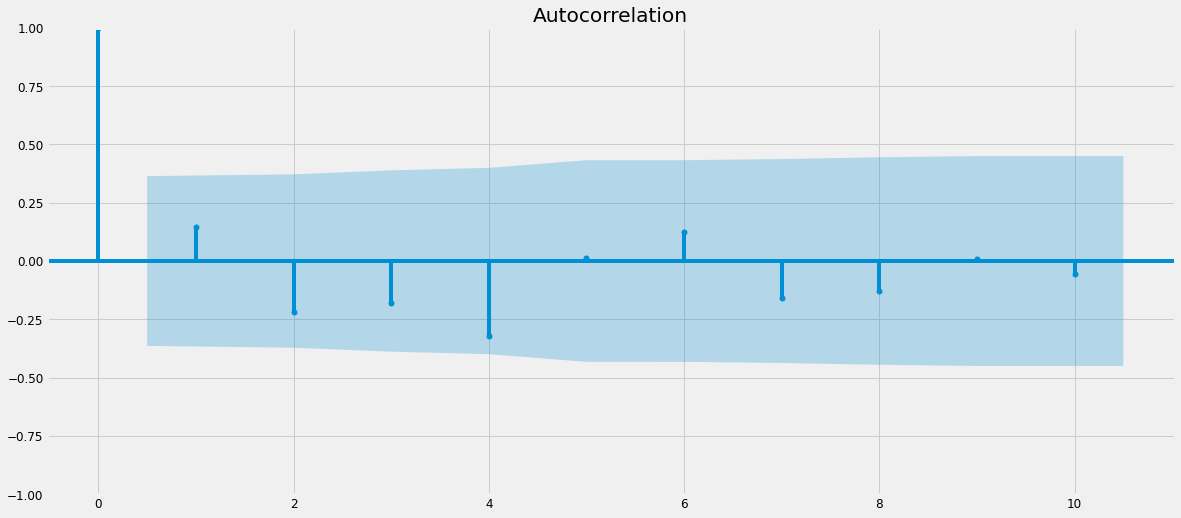

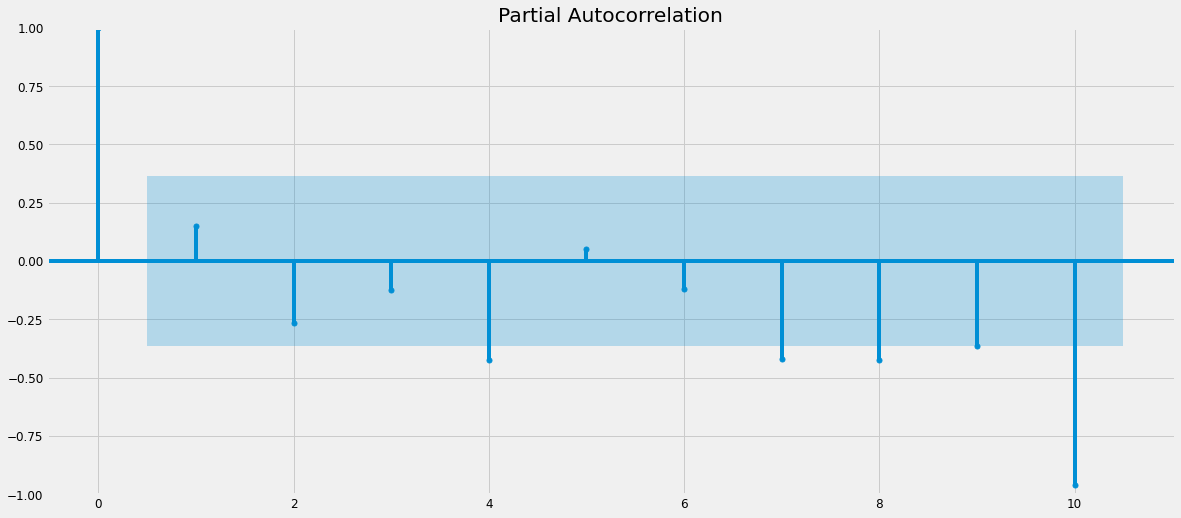

In [20]:
# Plotting the ACF and PACF Plot of the Trend and Seasonally adjusted Time Series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_t_adj, lags=10)
matplotlib.pyplot.show()
plot_pacf(ts_t_adj, lags = 10)
matplotlib.pyplot.show()

In [21]:
p = range(0, 3)
d = range(1,2)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
seasonal_pdq

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (0, 1, 3, 12)


[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12)]

In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_s_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            )
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: 2.866543
         Iterations: 2
         Function evaluations: 35
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:139.59405318987035
Optimization terminated successfully.
         Current function value: 2.865249
         Iterations: 2
         Function evaluations: 44
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:141.53193956389106
Optimization terminated successfully.
         Current function value: 2.864874
         Iterations: 2
         Function evaluations: 72
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:143.51393858581451
Optimization terminated successfully.
         Current function value: 2.866005
         Iterations: 2
         Function evaluations: 92
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:145.56825561477476
Optimization terminated successfully.
         Current function value: 2.865154
         Iterations: 2
         Function evaluations: 58
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:141.52739716294204
Optimization terminated successfull

c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(0, 1, 2, 12)12 - AIC:nan
ARIMA(0, 1, 3)x(0, 1, 3, 12)12 - AIC:nan
ARIMA(0, 1, 3)x(1, 1, 0, 12)12 - AIC:nan


c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(1, 1, 1, 12)12 - AIC:nan
ARIMA(0, 1, 3)x(1, 1, 2, 12)12 - AIC:nan


c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(1, 1, 3, 12)12 - AIC:nan
ARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:nan


c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(2, 1, 1, 12)12 - AIC:nan
ARIMA(0, 1, 3)x(2, 1, 2, 12)12 - AIC:nan


c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 3)x(2, 1, 3, 12)12 - AIC:nan
Optimization terminated successfully.
         Current function value: 2.774343
         Iterations: 1
         Function evaluations: 23
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:137.16845889304577
Optimization terminated successfully.
         Current function value: 2.765722
         Iterations: 2
         Function evaluations: 83
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:138.7546718701293
Optimization terminated successfully.
         Current function value: 2.762648
         Iterations: 3
         Function evaluations: 167
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:140.60711200054638
Optimization terminated successfully.
         Current function value: 2.761313
         Iterations: 3
         Function evaluations: 206
ARIMA(1, 1, 0)x(0, 1, 3, 12)12 - AIC:142.54302917719212
Optimization terminated successfully.
         Current function value: 2.758081
         Iterations: 3
         Function evaluations: 134
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:138.3878839

c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 3)x(0, 1, 2, 12)12 - AIC:nan


c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 3)x(0, 1, 3, 12)12 - AIC:nan
ARIMA(1, 1, 3)x(1, 1, 0, 12)12 - AIC:nan
ARIMA(1, 1, 3)x(1, 1, 1, 12)12 - AIC:nan
ARIMA(1, 1, 3)x(1, 1, 2, 12)12 - AIC:nan


c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 3)x(1, 1, 3, 12)12 - AIC:nan
ARIMA(1, 1, 3)x(2, 1, 0, 12)12 - AIC:nan


c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 3)x(2, 1, 1, 12)12 - AIC:nan


c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 3)x(2, 1, 2, 12)12 - AIC:nan


c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 3)x(2, 1, 3, 12)12 - AIC:nan
Optimization terminated successfully.
         Current function value: 2.769766
         Iterations: 2
         Function evaluations: 71
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:138.94877595522965
Optimization terminated successfully.
         Current function value: 2.761064
         Iterations: 4
         Function evaluations: 205
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:140.53107213831322
Optimization terminated successfully.
         Current function value: 2.758245
         Iterations: 5
         Function evaluations: 324
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:142.3957769614773
Optimization terminated successfully.
         Current function value: 2.756145
         Iterations: 6
         Function evaluations: 464
ARIMA(2, 1, 0)x(0, 1, 3, 12)12 - AIC:144.2949726142168
Optimization terminated successfully.
         Current function value: 2.754210
         Iterations: 5
         Function evaluations: 254
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:140.2020876

c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3)x(0, 1, 1, 12)12 - AIC:nan
ARIMA(2, 1, 3)x(0, 1, 2, 12)12 - AIC:nan
ARIMA(2, 1, 3)x(0, 1, 3, 12)12 - AIC:nan
ARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:nan


c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3)x(1, 1, 1, 12)12 - AIC:nan
ARIMA(2, 1, 3)x(1, 1, 2, 12)12 - AIC:nan


c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3)x(1, 1, 3, 12)12 - AIC:nan


c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:nan
ARIMA(2, 1, 3)x(2, 1, 1, 12)12 - AIC:nan


c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3)x(2, 1, 2, 12)12 - AIC:nan
ARIMA(2, 1, 3)x(2, 1, 3, 12)12 - AIC:nan


c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
#ARIMA(0, 1, 1)x(2, 1, 0, 12)
mod = sm.tsa.statespace.SARIMAX(ts_s_adj,
                                order=(0, 1, 1),
                                seasonal_order=(2, 1, 0, 5))
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 4.858604
         Iterations: 6
         Function evaluations: 301
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9613      1.901     -0.506      0.613      -4.687       2.765
ar.S.L5       -0.7680      0.378     -2.031      0.042      -1.509      -0.027
ar.S.L10      -0.1106      0.449     -0.246      0.806      -0.991       0.770
sigma2      1.762e+04   3.08e+04      0.573      0.567   -4.27e+04    7.79e+04


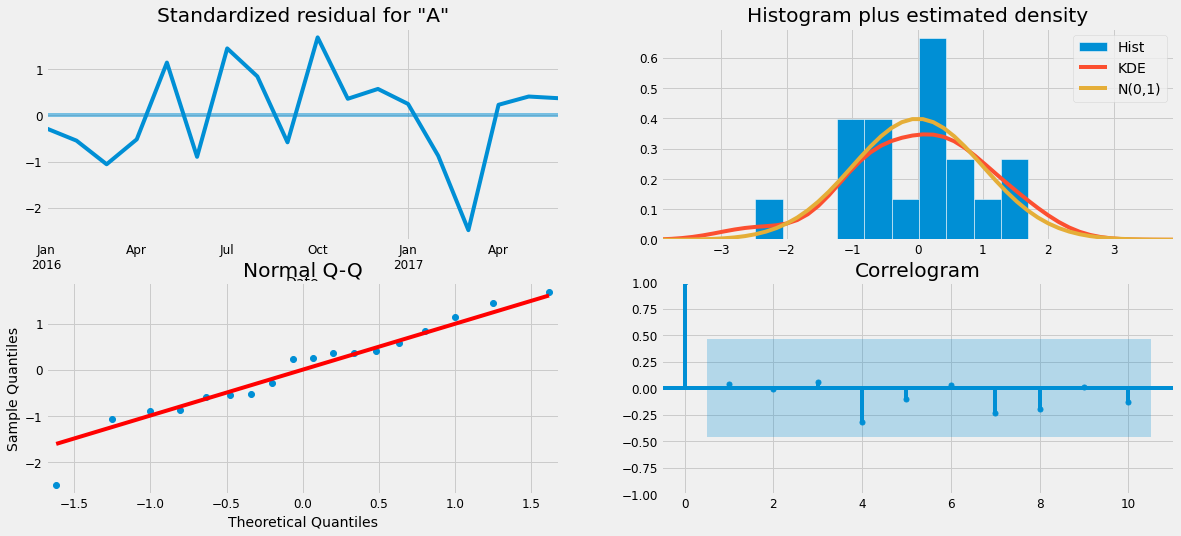

In [24]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

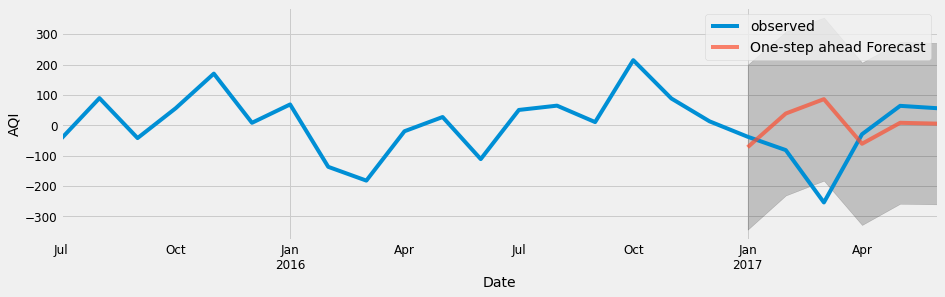

In [25]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts_s_adj.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.legend()
plt.show()

In [26]:
y_forecasted = pred.predicted_mean
y_truth = ts_s_adj['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 23027.27
The Root Mean Squared Error is 151.75
